In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime

import glob
import os

import yfinance as yf

from datetime import timezone, datetime

import requests

pd.set_option('mode.chained_assignment', None)

In [305]:
DATA_PATH = "data/data_out/"

In [306]:
def getTicker(company_name):
    yfinance = "https://query2.finance.yahoo.com/v1/finance/search"
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    params = {"q": company_name, "quotes_count": 1, "country": "Poland"}

    res = requests.get(url=yfinance, params=params, headers={'User-Agent': user_agent})
    data = res.json()

    try:
        company_code = data['quotes'][0]['symbol']
    except:
        company_code = None
    return company_code

In [307]:
df = pd.DataFrame()
for file_path in glob.glob(os.path.join(DATA_PATH, '*.csv')):
    df = pd.concat([df, pd.read_csv(file_path)], ignore_index=True)

df=df.drop(columns='Unnamed: 0')
companies_cols = df.columns.values[1:]
df

,Date,SANTANDER,UNICREDIT,CEZ,PKNORLEN,PKOBP,DINOPL,PZU,ALLEGRO,SANPL,...,WIRTUALNA,GRUPRACUJ,NEUCA,STSHLDING,PLAYWAY,DOMDEV,ASSECOSEE,CIECH,BENEFIT,PCCROKITA
0,2013-04-15,NaN,inf,inf,inf,inf,NaN,inf,NaN,NaN,...,NaN,NaN,inf,NaN,NaN,inf,inf,inf,inf,NaN
1,2013-04-17,NaN,0.085608,0.018996,0.015920,0.011696,NaN,0.003612,NaN,NaN,...,NaN,NaN,0.021398,NaN,NaN,0.014162,0.053191,0.034976,0.024833,NaN
2,2013-04-18,NaN,0.063158,0.011111,0.014504,0.004969,NaN,0.009962,NaN,NaN,...,NaN,NaN,0.021661,NaN,NaN,0.015748,0.043165,0.020666,0.022901,NaN
3,2013-04-19,NaN,0.119250,0.014132,-2.000000,0.000300,NaN,-2.000000,NaN,NaN,...,NaN,NaN,0.018416,NaN,NaN,0.015436,0.028006,0.029714,0.047801,NaN
4,2013-04-22,NaN,0.097166,0.014132,0.024666,0.014521,NaN,0.009852,NaN,NaN,...,NaN,NaN,0.048604,NaN,NaN,0.015748,inf,0.011534,0.053232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2017-07-19,0.074462,0.054772,0.010828,0.008518,0.010141,0.037574,0.003165,NaN,NaN,...,0.032598,NaN,0.014162,NaN,0.039333,0.013245,0.027239,0.005119,0.017024,0.008433
1063,2017-07-20,0.100244,0.054204,0.013163,0.006767,0.001668,0.038164,0.004913,NaN,NaN,...,0.027738,NaN,0.010297,NaN,0.016529,0.012978,0.006536,0.014342,0.018657,0.000538
1064,2017-07-21,0.105263,0.066920,0.008342,0.004094,0.003351,0.036944,0.004397,NaN,NaN,...,0.036405,NaN,0.030616,NaN,0.002950,0.038692,0.016529,0.016481,0.024952,0.004077
1065,2017-07-24,0.069965,0.106744,0.028294,0.002351,0.003907,0.048857,0.001984,NaN,NaN,...,0.045084,NaN,0.019611,NaN,0.046816,0.044016,0.083121,0.008957,0.021853,0.010056


In [308]:
df_filter = df.iloc[:,1:].where(df.iloc[:,1:] > 0)
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df = pd.concat([df.loc[:, 'Date'], df_filter], axis=1)
df

,Date,SANTANDER,UNICREDIT,CEZ,PKNORLEN,PKOBP,DINOPL,PZU,ALLEGRO,SANPL,...,WIRTUALNA,GRUPRACUJ,NEUCA,STSHLDING,PLAYWAY,DOMDEV,ASSECOSEE,CIECH,BENEFIT,PCCROKITA
0,2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-17,NaN,0.085608,0.018996,0.015920,0.011696,NaN,0.003612,NaN,NaN,...,NaN,NaN,0.021398,NaN,NaN,0.014162,0.053191,0.034976,0.024833,NaN
2,2013-04-18,NaN,0.063158,0.011111,0.014504,0.004969,NaN,0.009962,NaN,NaN,...,NaN,NaN,0.021661,NaN,NaN,0.015748,0.043165,0.020666,0.022901,NaN
3,2013-04-19,NaN,0.119250,0.014132,NaN,0.000300,NaN,NaN,NaN,NaN,...,NaN,NaN,0.018416,NaN,NaN,0.015436,0.028006,0.029714,0.047801,NaN
4,2013-04-22,NaN,0.097166,0.014132,0.024666,0.014521,NaN,0.009852,NaN,NaN,...,NaN,NaN,0.048604,NaN,NaN,0.015748,NaN,0.011534,0.053232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2017-07-19,0.074462,0.054772,0.010828,0.008518,0.010141,0.037574,0.003165,NaN,NaN,...,0.032598,NaN,0.014162,NaN,0.039333,0.013245,0.027239,0.005119,0.017024,0.008433
1063,2017-07-20,0.100244,0.054204,0.013163,0.006767,0.001668,0.038164,0.004913,NaN,NaN,...,0.027738,NaN,0.010297,NaN,0.016529,0.012978,0.006536,0.014342,0.018657,0.000538
1064,2017-07-21,0.105263,0.066920,0.008342,0.004094,0.003351,0.036944,0.004397,NaN,NaN,...,0.036405,NaN,0.030616,NaN,0.002950,0.038692,0.016529,0.016481,0.024952,0.004077
1065,2017-07-24,0.069965,0.106744,0.028294,0.002351,0.003907,0.048857,0.001984,NaN,NaN,...,0.045084,NaN,0.019611,NaN,0.046816,0.044016,0.083121,0.008957,0.021853,0.010056


In [309]:
df = pd.concat([df.loc[:, 'Date'], np.log(df.iloc[:,1:]).diff()], axis=1)
df

,Date,SANTANDER,UNICREDIT,CEZ,PKNORLEN,PKOBP,DINOPL,PZU,ALLEGRO,SANPL,...,WIRTUALNA,GRUPRACUJ,NEUCA,STSHLDING,PLAYWAY,DOMDEV,ASSECOSEE,CIECH,BENEFIT,PCCROKITA
0,2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-18,NaN,-0.304145,-0.536279,-0.093147,-0.856105,NaN,1.014472,NaN,NaN,...,NaN,NaN,0.012200,NaN,NaN,0.106148,-0.208858,-0.526181,-0.080997,NaN
3,2013-04-19,NaN,0.635588,0.240518,NaN,-2.806557,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.162266,NaN,NaN,-0.020045,-0.432629,0.363143,0.735871,NaN
4,2013-04-22,NaN,-0.204805,0.000000,NaN,3.878996,NaN,NaN,NaN,NaN,...,NaN,NaN,0.970466,NaN,NaN,0.020045,NaN,-0.946327,0.107617,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2017-07-19,0.057580,0.191272,0.105902,-0.142800,0.813743,0.462934,0.691450,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.549074,-0.324603,0.166364,0.410827,-0.280938,-0.475016
1063,2017-07-20,0.297328,-0.010415,0.195317,-0.230092,-1.805190,0.015580,0.439627,NaN,NaN,...,-0.161459,NaN,-0.318727,NaN,-0.866948,-0.020335,-1.427331,1.030206,0.091557,-2.752393
1064,2017-07-21,0.048851,0.210732,-0.456065,-0.502672,0.697883,-0.032501,-0.111041,NaN,NaN,...,0.271900,NaN,1.089711,NaN,-1.723193,1.092357,0.927795,0.138999,0.290748,2.025624
1065,2017-07-24,-0.408471,0.466937,1.221304,-0.554489,0.153592,0.279513,-0.795536,NaN,NaN,...,0.213834,NaN,-0.445446,NaN,2.764306,0.128916,1.615189,-0.609772,-0.132629,0.902709


In [310]:
df = df.melt(id_vars=['Date'],var_name='company' ,value_name='spread').replace([np.inf, -np.inf], np.nan).dropna()
df

,Date,company,spread
409,2014-12-05,SANTANDER,-0.753043
410,2014-12-08,SANTANDER,0.440389
411,2014-12-09,SANTANDER,-0.801404
412,2014-12-10,SANTANDER,1.605816
413,2014-12-11,SANTANDER,0.097935
...,...,...,...
53345,2017-07-19,PCCROKITA,-0.475016
53346,2017-07-20,PCCROKITA,-2.752393
53347,2017-07-21,PCCROKITA,2.025624
53348,2017-07-24,PCCROKITA,0.902709


In [311]:
companies_cols

array(['SANTANDER', 'UNICREDIT', 'CEZ', 'PKNORLEN', 'PKOBP', 'DINOPL',
       'PZU', 'ALLEGRO', 'SANPL', 'KGHM', 'MOL', 'PEKAO', 'PEPCO',
       'INGBSK', 'LPP', 'PGE', 'KRKA', 'MBANK', 'CDPROJEKT', 'CYFRPLSAT',
       'HANDLOWY', 'ORANGEPL', 'BNPPL', 'IIAAV', 'BUDIMEX', 'JSW', 'KRUK',
       'MILLENNIUM', 'INTERCARS', 'ASSECOPOL', 'PEP', 'ALIOR', 'KETY',
       'GRPAAZOTY', 'AMREST', 'XTB', 'TAURONPE', 'GTC', 'ENEA',
       'LIVECHAT', 'WIRTUALNA', 'GRUPRACUJ', 'NEUCA', 'STSHLDING',
       'PLAYWAY', 'DOMDEV', 'ASSECOSEE', 'CIECH', 'BENEFIT', 'PCCROKITA'],
      dtype=object)

In [312]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, utc=False).replace(tzinfo=None))
df

,Date,company,spread
409,2014-12-05,SANTANDER,-0.753043
410,2014-12-08,SANTANDER,0.440389
411,2014-12-09,SANTANDER,-0.801404
412,2014-12-10,SANTANDER,1.605816
413,2014-12-11,SANTANDER,0.097935
...,...,...,...
53345,2017-07-19,PCCROKITA,-0.475016
53346,2017-07-20,PCCROKITA,-2.752393
53347,2017-07-21,PCCROKITA,2.025624
53348,2017-07-24,PCCROKITA,0.902709


In [313]:
if os.path.exists('prices.pkl'):
    with open('prices.pkl', 'rb') as file:
        df_concat = pd.read_pickle(file)
else:
    df_concat = pd.DataFrame()
    for comapny in companies_cols:
        ticker_name = getTicker(comapny)
        # print(f'{comapny}:{ticker_name}')
        if ticker_name == None:
            continue
        yf_company = yf.Ticker(ticker_name)
        hist = yf_company.history(period="max")
        hist = pd.DataFrame(hist)
        hist = hist.reset_index()
        hist['Date'] = hist['Date'].apply(lambda x: pd.to_datetime(x, utc=False).replace(tzinfo=None))
        hist['company'] = comapny
        XY = df.set_index(['Date', 'company']).join(hist.set_index(['Date', 'company']), how='inner')
        XY = XY.reset_index()
        df_concat = pd.concat([df_concat, XY])

    df_concat = df_concat.rename(columns={'Close':'P', 'Volume':'V'})
    df_concat['(H-L)/P'] = df_concat['High'] - df_concat['Low'] / df_concat['P']
    df_concat = df_concat[['Date', 'company', 'P', 'V', '(H-L)/P']]
    df_concat.to_pickle('prices.pkl')
df_concat

,Date,company,P,V,(H-L)/P
0,2014-12-05,SANTANDER,6.500944,7343700.0,5.530982
1,2014-12-08,SANTANDER,6.435861,15009300.0,5.490975
2,2014-12-09,SANTANDER,6.305698,8766600.0,5.341504
3,2014-12-10,SANTANDER,6.197227,8535500.0,5.286336
4,2014-12-11,SANTANDER,6.197227,6867500.0,5.294735
...,...,...,...,...,...
752,2017-07-19,PCCROKITA,60.646732,271.0,59.652005
753,2017-07-20,PCCROKITA,60.685890,20583.0,59.948196
754,2017-07-21,PCCROKITA,61.012150,1198.0,60.356707
755,2017-07-24,PCCROKITA,60.046398,1079.0,59.692630


In [314]:
df_concat = np.log(df_concat.pivot(index='Date', columns=['company'], values=['P', 'V', '(H-L)/P'])).diff().stack().reset_index().replace([np.inf, -np.inf], np.nan).dropna()
df_concat

,Date,company,P,V,(H-L)/P
0,2013-04-19,ASSECOPOL,-0.002323,0.337492,-0.000721
1,2013-04-19,ASSECOSEE,-0.028988,2.403938,-0.070775
2,2013-04-19,BUDIMEX,-0.010899,-0.868654,-0.000627
3,2013-04-19,CDPROJEKT,0.000000,-0.768163,-0.016977
4,2013-04-19,CEZ,0.003015,-0.545584,0.009348
...,...,...,...,...,...
30612,2017-07-25,SANTANDER,0.010378,-0.088793,0.020730
30613,2017-07-25,TAURONPE,0.002656,0.430970,-0.013917
30614,2017-07-25,UNICREDIT,0.015991,0.298869,0.018407
30615,2017-07-25,WIRTUALNA,-0.001701,2.964621,-0.008927


In [315]:
df = df.set_index(['Date', 'company']).join(df_concat.set_index(['Date', 'company']), how='inner').reset_index().dropna()
df

,Date,company,spread,P,V,(H-L)/P
0,2014-12-08,SANTANDER,0.440389,-0.010062,0.714827,-0.007259
1,2014-12-09,SANTANDER,-0.801404,-0.020432,-0.537721,-0.027599
2,2014-12-10,SANTANDER,1.605816,-0.017352,-0.026715,-0.010382
3,2014-12-11,SANTANDER,0.097935,0.000000,-0.217434,0.001587
4,2014-12-18,SANTANDER,0.813120,0.023311,-0.547114,0.021781
...,...,...,...,...,...,...
28843,2017-07-19,PCCROKITA,-0.475016,0.002046,0.726921,0.001896
28844,2017-07-20,PCCROKITA,-2.752393,0.000645,4.330102,0.004953
28845,2017-07-21,PCCROKITA,2.025624,0.005362,-2.843812,0.006791
28846,2017-07-24,PCCROKITA,0.902709,-0.015955,-0.104619,-0.011064


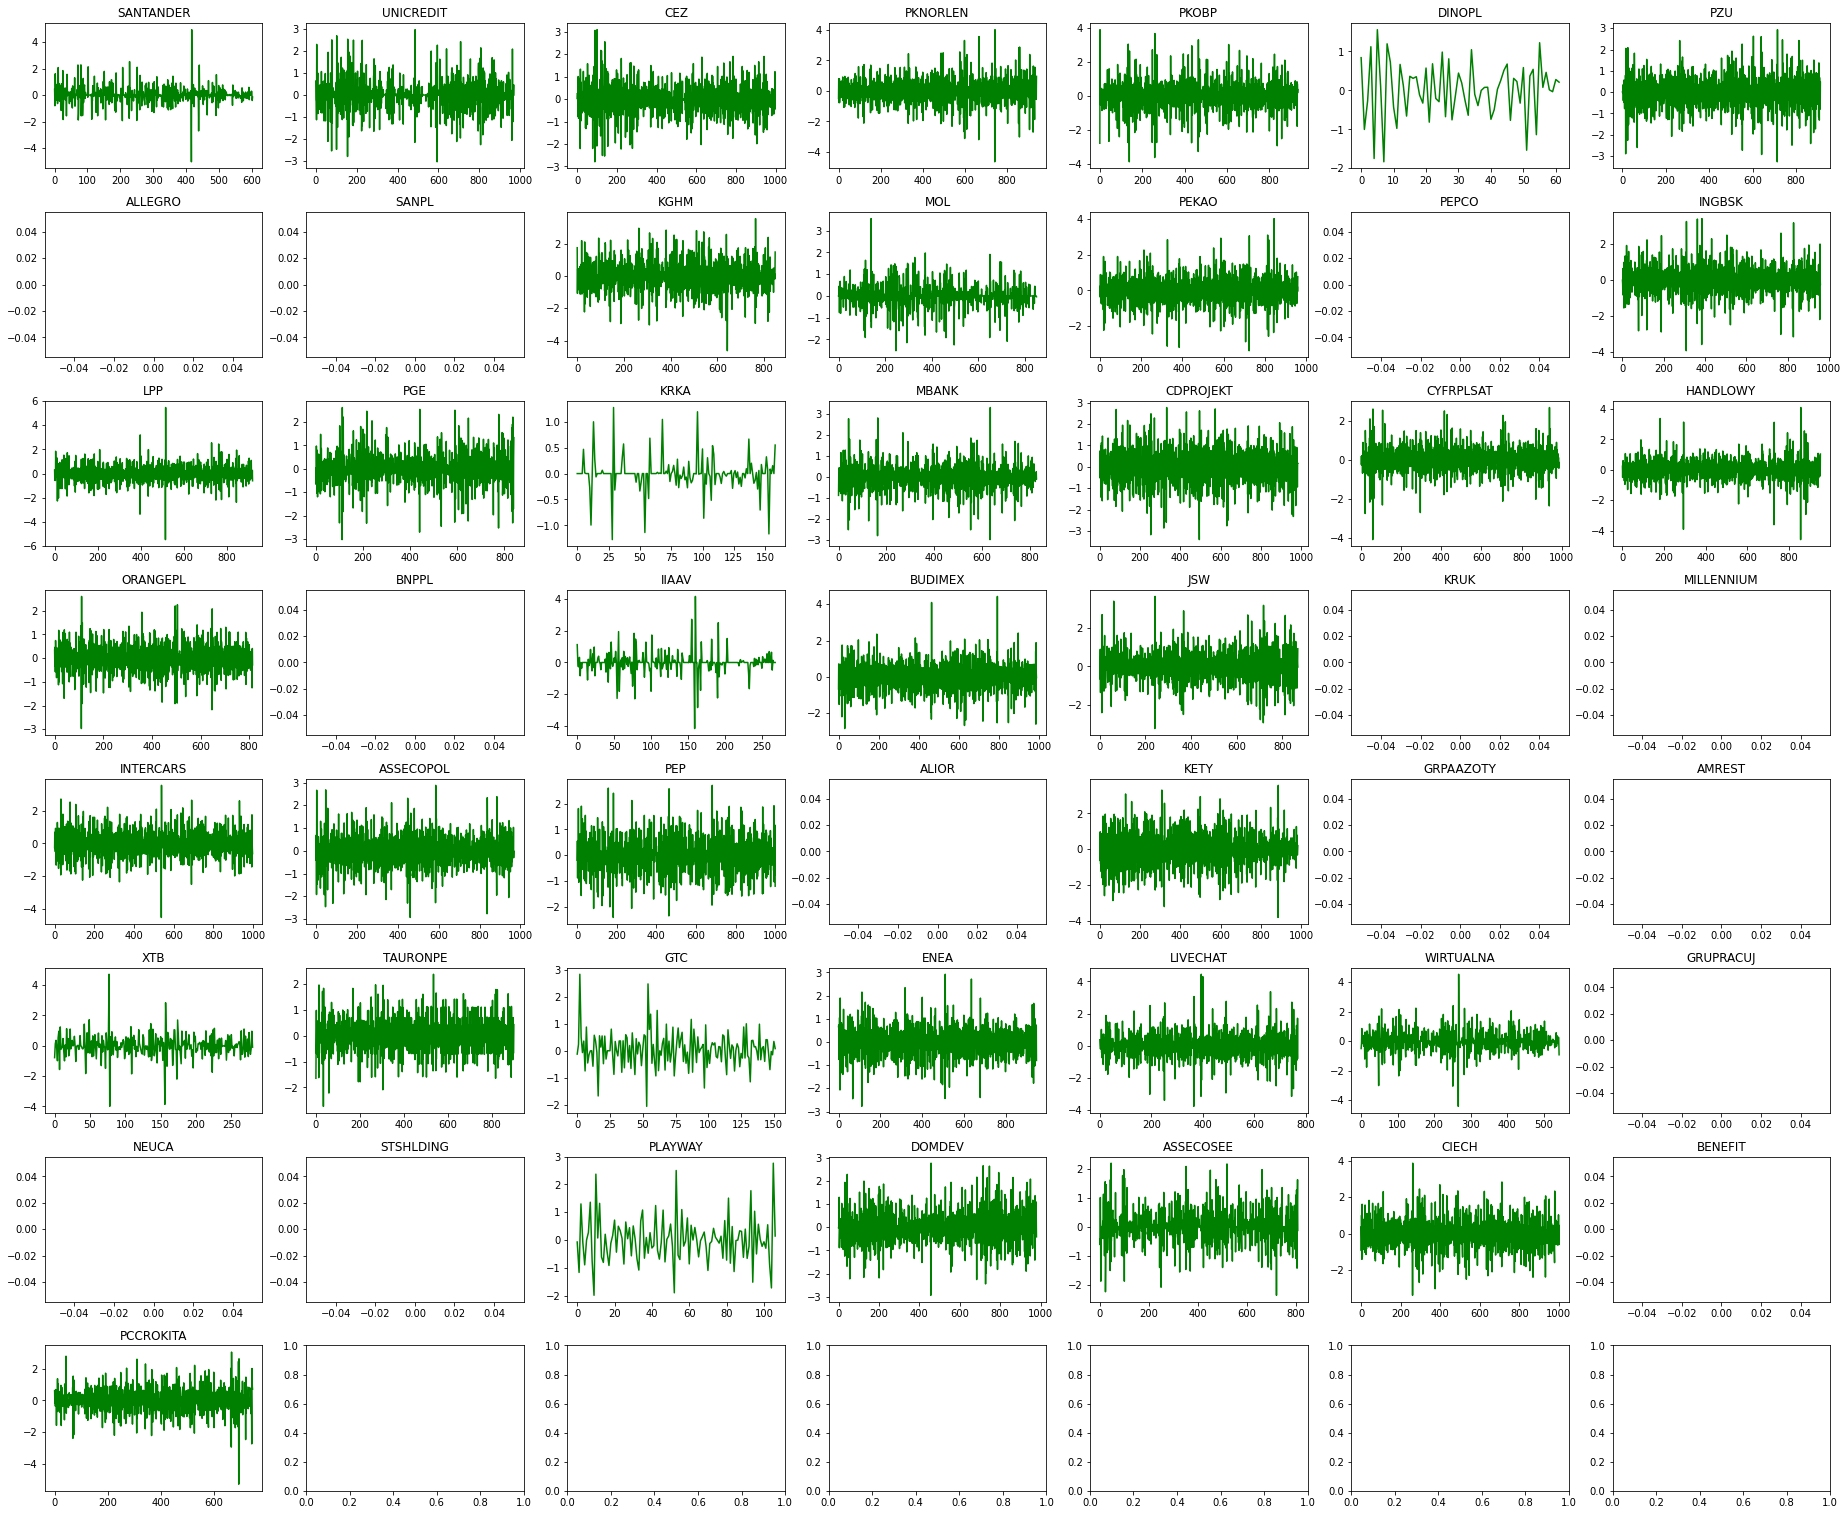

In [316]:
fig, ax = plt.subplots(8, 7, figsize = (16*2, 9*3))
fig.subplots_adjust(
                    hspace=0.3)
for it, comapny in enumerate(companies_cols):
    x_val = df[df['company']==comapny].reset_index(drop=True).reindex().index.values
    y_val = df[df['company']==comapny]['spread'].values
    current_axis = ax[it//7,it%7]
    current_axis.set_title(comapny)
    current_axis.plot(x_val, y_val, 'g')

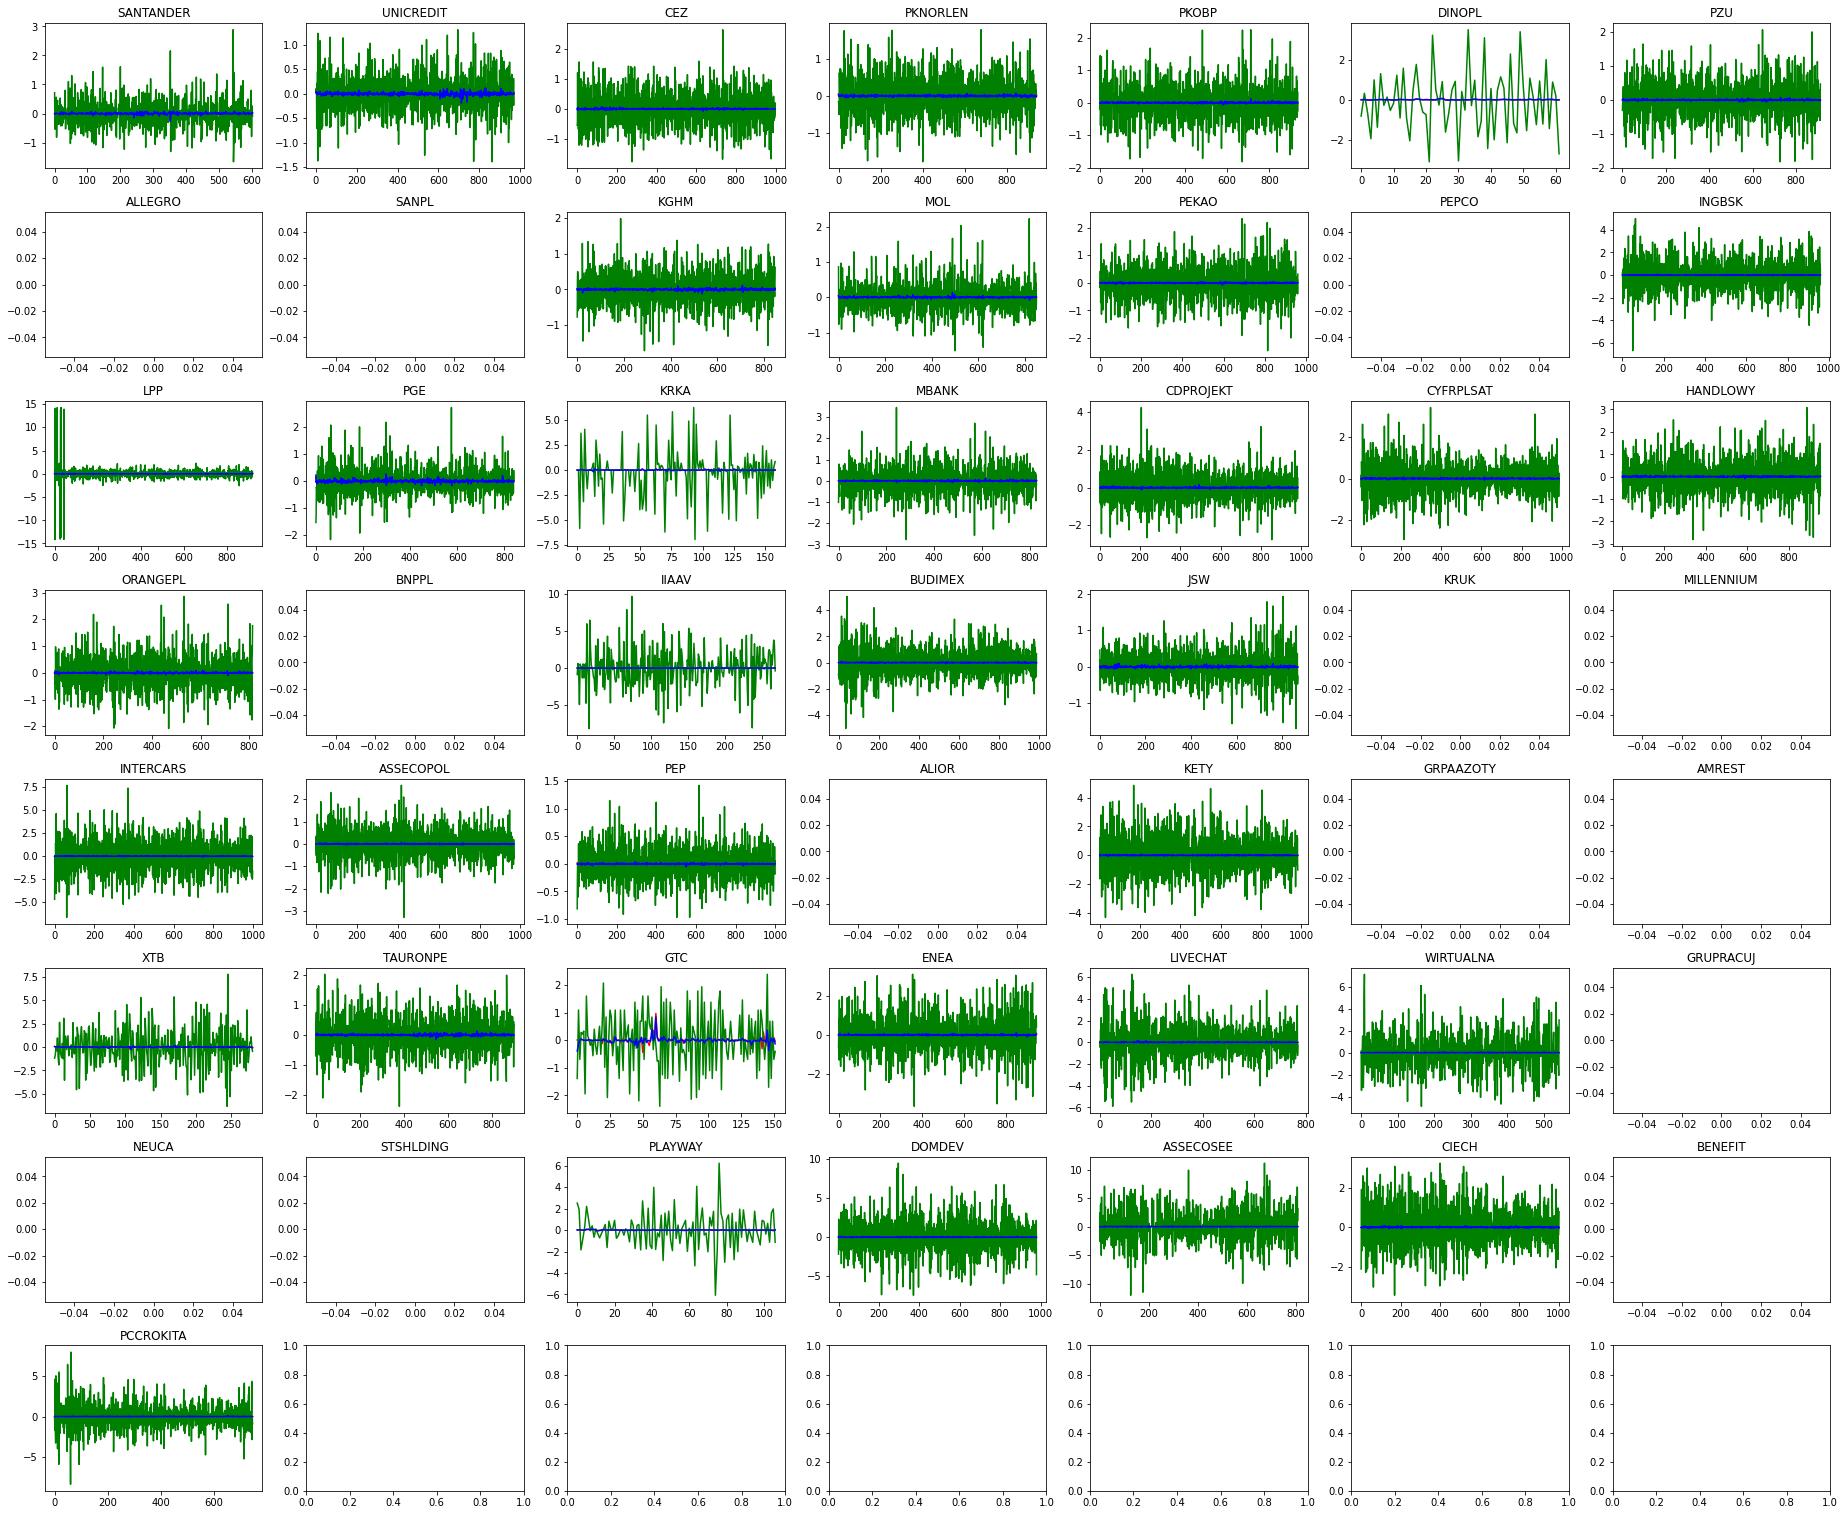

In [317]:
fig, ax = plt.subplots(8, 7, figsize = (16*2, 9*3))
fig.subplots_adjust(
                    hspace=0.3)
for it, comapny in enumerate(companies_cols):
    current_axis = ax[it//7,it%7]
    current_axis.set_title(comapny)
    x_val = df[df['company']==comapny].reset_index(drop=True).reindex().index.values
    y_val = df[df['company']==comapny]['P'].values
    current_axis.plot(x_val, y_val, 'r')
    y_val = df[df['company']==comapny]['V'].values
    current_axis.plot(x_val, y_val, 'g')
    y_val = df[df['company']==comapny]['(H-L)/P'].values
    current_axis.plot(x_val, y_val, 'b')

In [318]:
filtr_val = 'CIECH'
filtr = df['company'] if filtr_val=='' else filtr_val
filtr_df = df[df['company']==filtr]

filtr_df_ = filtr_df.sample(frac=0.6).dropna()
test_df = filtr_df.drop(filtr_df_.index).dropna()
filtr_df = filtr_df_

print(f'train_len: {len(filtr_df)}, test_len: {len(test_df)}')


train_len: 601, test_len: 401


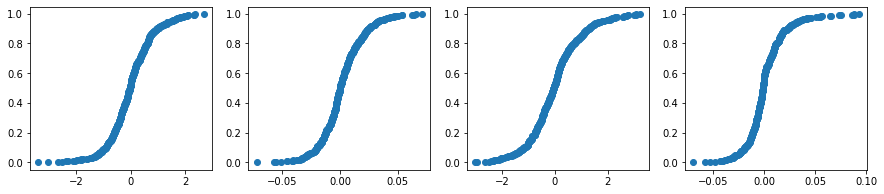

In [319]:
variables_names = ['spread', 'P', 'V', '(H-L)/P']
syt_tab = [filtr_df[[col_name]].sort_values(col_name).reset_index(drop=True) for col_name in variables_names]

fig, ax = plt.subplots(1, 4, figsize = (15, 3))
for var in range(len(variables_names)):
    ax[var].scatter(x=syt_tab[var].iloc[:, 0].values, y=np.array((syt_tab[var].index-0.5)/len(syt_tab[var].index)))
plt.show()

In [320]:
mu_tab = [filtr_df[col_name].median() for col_name in variables_names]
b_tab = [(np.abs(filtr_df[col_name] - mu_tab[it])).mean() for it, col_name in enumerate(variables_names)]
for v,m,b in zip(variables_names,mu_tab,b_tab):
    print(v,': mu=',m,'b=',b)

spread : mu= -0.033287459061175806 b= 0.6040015119144194
P : mu= 0.0 b= 0.013717569958177805
V : mu= -0.048947447285414114 b= 0.7465241380543611
(H-L)/P : mu= -0.0011641940486204483 b= 0.012810027778646725


In [321]:
def cdf_L(y,mu,b):
    return np.exp((y-mu)/b)/2 if y<mu else 1-np.exp(-(y-mu)/b)/2

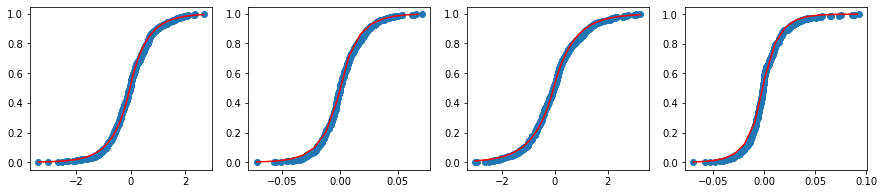

In [322]:
fig, ax = plt.subplots(1, 4, figsize = (15, 3))
for it, var_name in enumerate(variables_names):
    min_val, max_val = filtr_df[var_name].min(), filtr_df[var_name].max()
    y_val = [cdf_L(x,mu_tab[it],b_tab[it]) for x in np.arange(min_val,max_val, 0.01)]
    x_val = [x for x in np.arange(min_val,max_val, 0.01)]
    ax[it].plot(x_val,y_val, 'r')
    ax[it].scatter(x=syt_tab[it].iloc[:, 0].values, y=np.array((syt_tab[it].index-0.5)/len(syt_tab[it].index)))

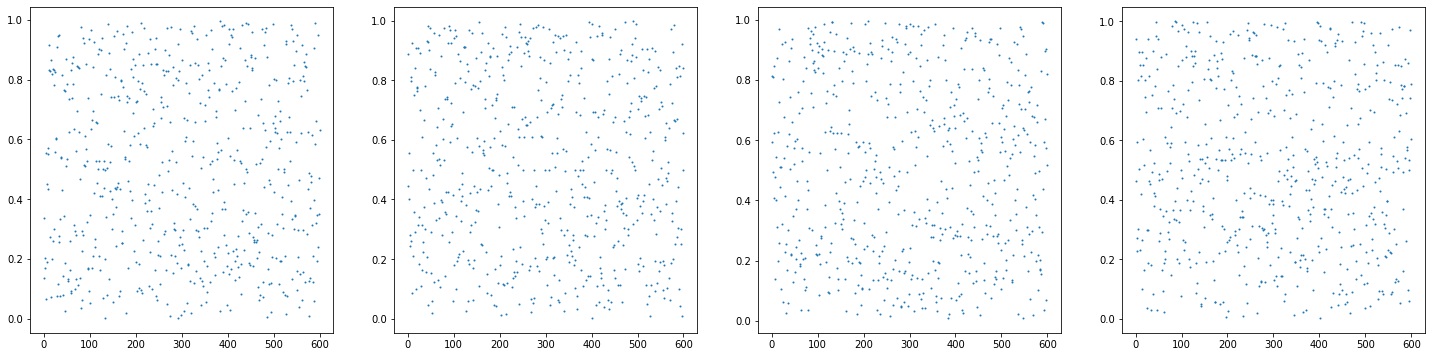

In [323]:
fig, ax = plt.subplots(1, 4, figsize = (25, 6))
xt = [filtr_df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]
for it, var_name in enumerate(variables_names):
    ax[it].scatter(xt[it].reset_index(drop=True).reindex().index,xt[it], 1)


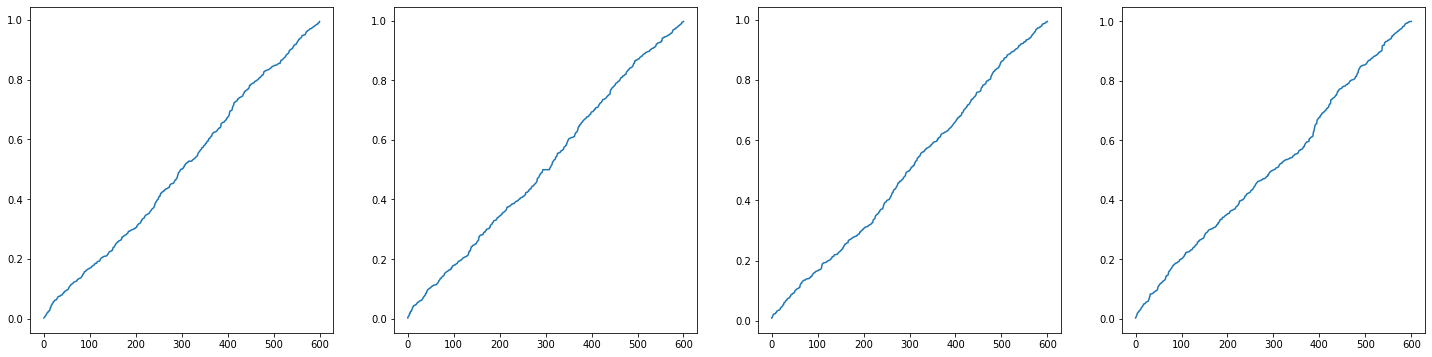

In [324]:
fig, ax = plt.subplots(1, 4, figsize = (25, 6))
for it, var_name in enumerate(variables_names):
    y_val = xt[it].sort_values().reset_index(drop=True)
    ax[it].plot(y_val)

# 

In [325]:
l_poln = [
    lambda x: 1,
    lambda x: np.sqrt(3)*(-1 + 2*x),
    lambda x: np.sqrt(5)*(1 - 6*x + 6*x**2),
    lambda x: np.sqrt(7)*(-1 + 12*x - 30*x**2 + 20*x**3),
    lambda x: 3 *(1-20*x+90*x**2-140*x**3+70*x**4),
]

In [326]:
d = 3 
m = len(l_poln)-1 #(* maximal degree of polynomial *)

coefn = np.power(m+1,d)
print(coefn, "coefficients")

125 coefficients


In [327]:
ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))
ct

,0,1,2,3
0,0.136933,0.887948,0.594329,0.941235
1,0.335972,0.446212,0.813557,0.464232
2,0.202631,0.555167,0.493929,0.595753
3,0.169582,0.400764,0.807951,0.227913
4,0.554173,0.280823,0.623953,0.269947
...,...,...,...,...
596,0.238304,0.007544,0.902279,0.058584
597,0.949185,0.921039,0.574872,0.971342
598,0.348940,0.500000,0.068814,0.743904
599,0.471712,0.840966,0.515726,0.787848


In [328]:
values_2 = []
for pol_f in l_poln:
    c_tab = []
    for idx, col in ct.iteritems():
        c_tab.append([pol_f(x) for x in col])
    values_2.append(c_tab)

ctp = np.array(values_2)
print(ctp.shape)

(5, 4, 601)


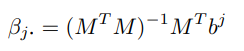

In [329]:
B_j_Y = [[row for row in ctp[fun][0]] for fun in range(len(l_poln))]
B_j_Y = np.array(B_j_Y)
print(B_j_Y.shape)

(5, 601)


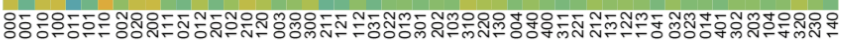

In [330]:
jt_tab = [[int(x) for x in np.base_repr(i, base=m+1).zfill(d)] for i in range(coefn)]

print(jt_tab[:6])
len(jt_tab)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 1, 0]]


125

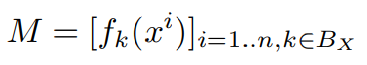

In [331]:
coef = []
for row in range(len(ctp[0][0])):
    ans = []
    for jt in jt_tab:
        ans.append(np.product([ctp[jt[i]][i+1][row] for i in range(len(jt))]))
    coef.append(ans)
coef = np.array(coef)
print(f'({len(coef)}, {len(coef[0])})')

(601, 125)


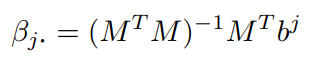

In [332]:
B_j_tab = [np.matmul(np.matmul(np.linalg.inv(np.matmul(coef.T,coef)),coef.T),B_j_Y[y_j]) for y_j in range(len(B_j_Y))]
print(f'({len(B_j_tab)}, {len(B_j_tab[0])})')

(5, 125)


#

<AxesSubplot:>

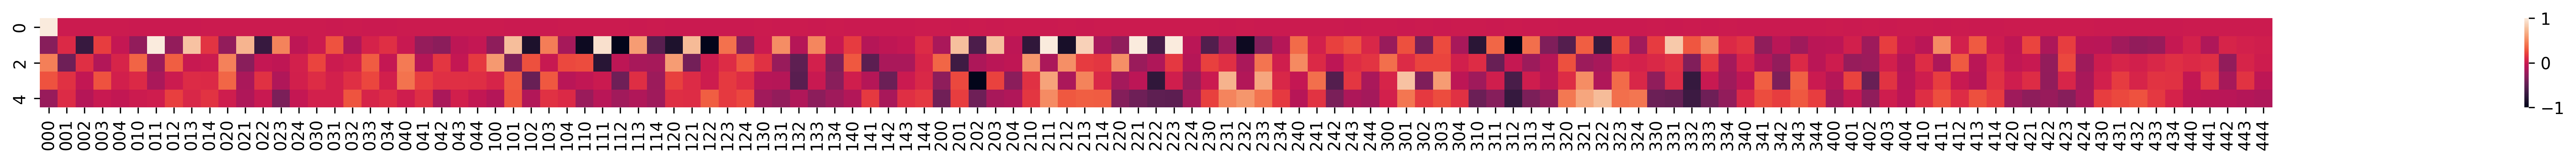

In [333]:
import seaborn as sns
coef_heatmap = pd.DataFrame(B_j_tab, columns=[''.join(list(map(str,el))) for el in jt_tab])
plt.figure(figsize=(55,1), dpi=300)
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(coef_heatmap, vmin=-1, vmax=1, square=True, ) #, square=True

In [334]:
pt = np.zeros(shape=(len(l_poln),len(ct)))
for j in range(len(l_poln)):
    for it, jt in enumerate(jt_tab):
        pt[j] += B_j_tab[j][it]*np.product([ctp[jt[c], c+1] for c in range(d)], axis=0)

for i in range(len(l_poln)-1, -1, -1):
    pt[i] /= pt[0]

pt.shape

(5, 601)

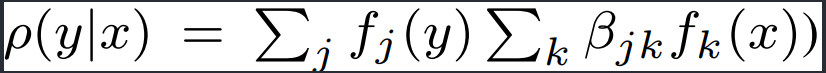

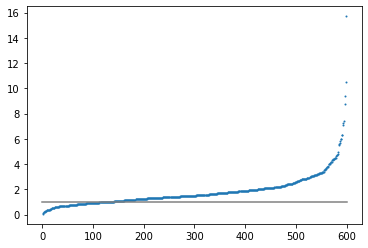

In [335]:
py_ = []
for i in range(1,len(ct)-1):
    py_.append(np.sum([pt[j][i] * l_poln[j](ct.iloc[i,0]) for j in range(len(l_poln))]))

plt.plot([0,len(ct)-1], [1,1], 'gray')
plt.scatter(range(1,len(ct)-1), np.sort(py_), 1)
plt.show()

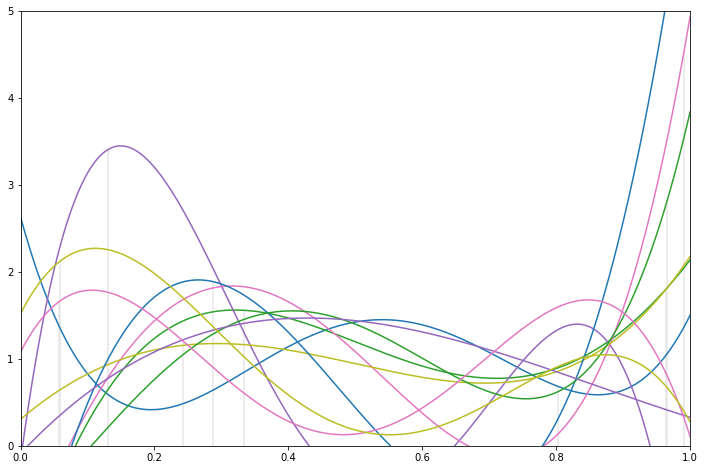

In [336]:
import random as rand
plst = [rand.randint(1,len(ct)-1) for _ in range(10)]
# plst = np.array([926, 644, 328, 269, 206, 928, 885, 504, 67, 441])
plt.figure(figsize=(12, 8))
plt.xlim(0,1)
plt.ylim(0,5)
x_range = np.arange(0,1,0.0001)
for i in plst:
    y_vals = [np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in np.arange(0,1,0.0001)]
    py_i = np.sum([pt[j][i] * l_poln[j](ct.iloc[i,0]) for j in range(len(l_poln))])
    plt.plot(list(x_range),y_vals, alpha=1)
    plt.stem(ct.iloc[i,0], py_i, '0.9', markerfmt=" ") 

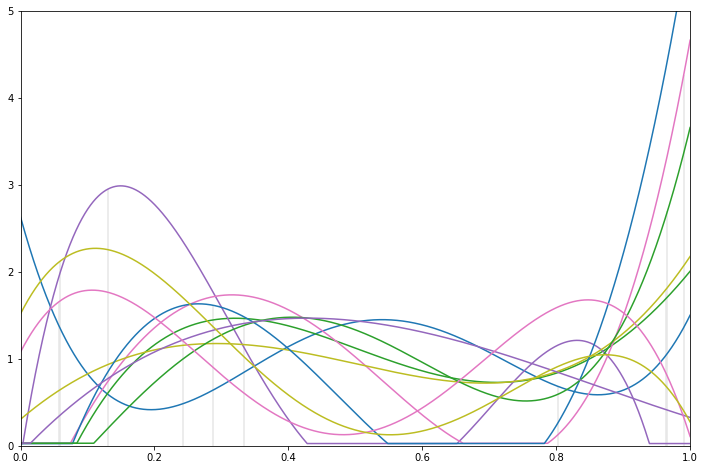

In [337]:
plt.figure(figsize=(12, 8))
plt.xlim(0,1)
plt.ylim(0,5)
treshold = 0.03
x_range = np.arange(0,1,0.0001)
for i in plst:
    y_vals = np.array([np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in x_range])
    y_vals = np.where(y_vals<treshold, 0.03, y_vals) 
    norm_val = np.trapz(y_vals, x=x_range)
    y_vals = y_vals / norm_val # normalize
    plt.plot(list(x_range),y_vals)

    py_i = np.sum([pt[j][i] * l_poln[j](ct.iloc[i,0]) for j in range(len(l_poln))]) / norm_val
    plt.stem(ct.iloc[i,0], py_i, '0.9', markerfmt=" ") 

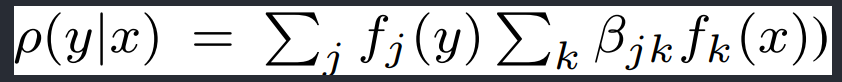

company: : train_len=25965, test_len=2885
company: UNICREDIT: train_len=882, test_len=98
company: MOL: train_len=774, test_len=86
company: ASSECOSEE: train_len=729, test_len=81
company: KETY: train_len=891, test_len=99
company: WIRTUALNA: train_len=495, test_len=55
company: LIVECHAT: train_len=693, test_len=77
company: PCCROKITA: train_len=675, test_len=75
company: PEKAO: train_len=873, test_len=97


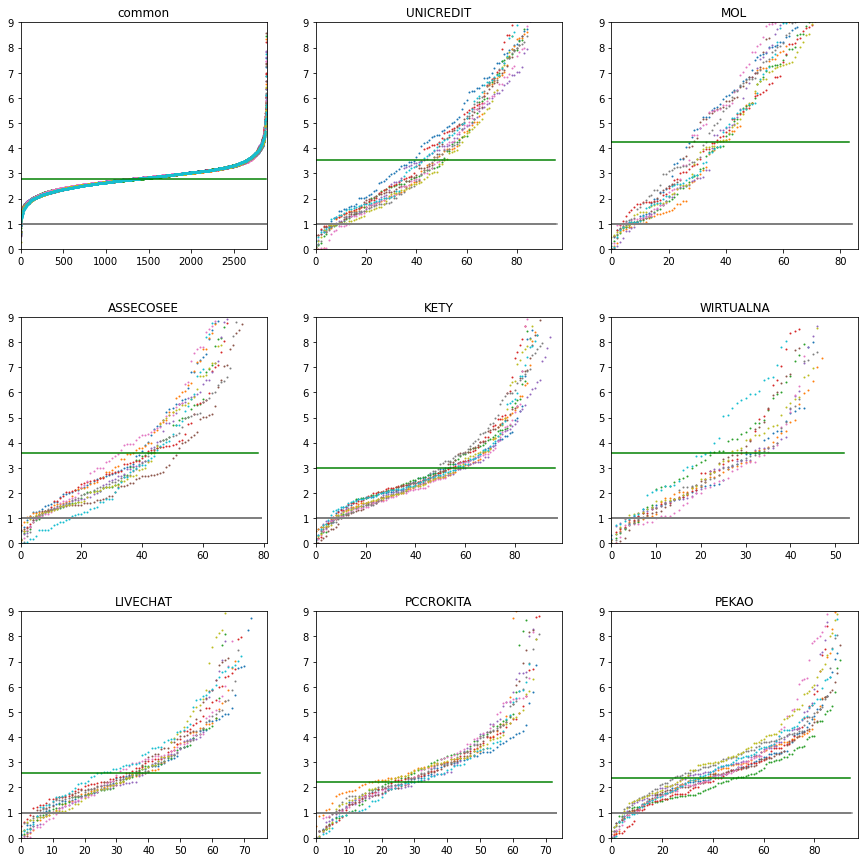

In [338]:
# companies_to_test = ["",
#     "SANTANDER",
#     "UNICREDIT",
#     "CEZ",
#     "PKNORLEN",
#     "PZU",
#     "KGHM",
#     "MOL",
#     "PEKAO",
#     "INGBSK",
#     "PGE",
#     "MBANK",
#     "CDPROJEKT",
#     "CYFRPLSAT",
#     "HANDLOWY",
#     "ORANGEPL",
#     "BUDIMEX",
#     "JSW",
#     "INTERCARS",
#     "ASSECOPOL",
#     "KETY",
#     "XTB",
#     "TAURONPE",
#     "ENEA",
#     "LIVECHAT",
#     "WIRTUALNA",
#     "DOMDEV",
#     "ASSECOSEE",
#     "CIECH",
#     "PCCROKITA"]

companies_to_test = ["", 'UNICREDIT',	'MOL',	'ASSECOSEE',	'KETY',	'WIRTUALNA','LIVECHAT',	'PCCROKITA'	,'PEKAO']

sqr_size = int(np.sqrt(len(companies_to_test)))
fig, ax = plt.subplots(sqr_size, sqr_size, figsize = (sqr_size*5, sqr_size*5))
fig.subplots_adjust(hspace=0.3)

ans_loss = {}
for it, filtr_val in enumerate(companies_to_test):
        current_axis = ax[it//sqr_size,it%sqr_size]
        filtr = df['company'] if filtr_val=='' else filtr_val
        filtr_df = df[df['company']==filtr]

        dfs = []
        filtr_df_ = filtr_df.sample(frac=1).dropna()
        dfs = np.array_split(filtr_df_, 10)  

        loss_tab = []

        print(f'company: {filtr_val}: train_len={len(dfs[0])*9}, test_len={len(dfs[0]) * 1}')

        # plt.figure(figsize=(12, 8))
        current_axis.set_ylim((0,9))
        current_axis.set_xlim((0,len(dfs[0])))
        for cross_it in range(10):

            test_df = dfs[cross_it]
            filtr_df = pd.concat(dfs).drop(test_df.index)


            ## TRAIN
            xt = [filtr_df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

            ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))

            values_2 = []
            for pol_f in l_poln:
                c_tab = []
                for idx, col in ct.iteritems():
                    c_tab.append([pol_f(x) for x in col])
                values_2.append(c_tab)

            ctp = np.array(values_2)

            B_j_Y = [[row for row in ctp[fun][0]] for fun in range(len(l_poln))]
            B_j_Y = np.array(B_j_Y)

            coef = []
            for row in range(len(ctp[0][0])):
                ans = []
                for jt in jt_tab:
                    ans.append(np.product([ctp[jt[i]][i+1][row] for i in range(len(jt))]))
                coef.append(ans)
            coef = np.array(coef)
            B_j_tab = [np.matmul(np.matmul(np.linalg.inv(np.matmul(coef.T,coef)),coef.T),B_j_Y[y_j]) for y_j in range(len(B_j_Y))]


            ## EVALUATION
            xt = [test_df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

            ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))
            values_2 = []
            for pol_f in l_poln:
                c_tab = []
                for idx, col in ct.iteritems():
                    c_tab.append([pol_f(x) for x in col])
                values_2.append(c_tab)

            ctp = np.array(values_2)

            pt = np.zeros(shape=(len(l_poln),len(ct)))
            for j in range(len(l_poln)):
                for it, jt in enumerate(jt_tab):
                    pt[j] += B_j_tab[j][it]*np.product([ctp[jt[c], c+1] for c in range(d)], axis=0)

            for i in range(len(l_poln)-1, -1, -1):
                pt[i] /= pt[0]

            x_range = np.arange(0,1,0.0001)
            y_vals = np.array([np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in x_range])
            y_vals = np.where(y_vals<treshold, 0.03, y_vals) 
            norm_val = np.trapz(y_vals, x=x_range)
            y_vals = y_vals / norm_val # normalize

            py_ = []
            for i in range(1,len(ct)-1):
                ap_val = np.sum([pt[j][i] * l_poln[j](ct.iloc[i,0]) for j in range(len(l_poln))]) # / norm_val
                py_.append(ap_val)

            current_axis.plot([0,len(py_)], [1,1], 'gray')
            current_axis.scatter(range(len(py_)), np.exp(np.sort(py_)), 1)

            py_ = pd.DataFrame(py_)
            loss = py_.mean().values[0]


            # print(f'{cross_it}: {loss}')
            loss_tab.append(loss)
        
        filtr_val = 'common' if filtr_val=='' else filtr_val
        ans_loss[filtr_val] = np.mean(loss_tab)

        current_axis.set_title(filtr_val)
        current_axis.plot([0, len(py_)], [np.exp(ans_loss[filtr_val]),np.exp(ans_loss[filtr_val])], 'g')

plt.show()

C:\Users\lukas\AppData\Local\Temp/ipykernel_467108/3955999115.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(companies_to_test_name)


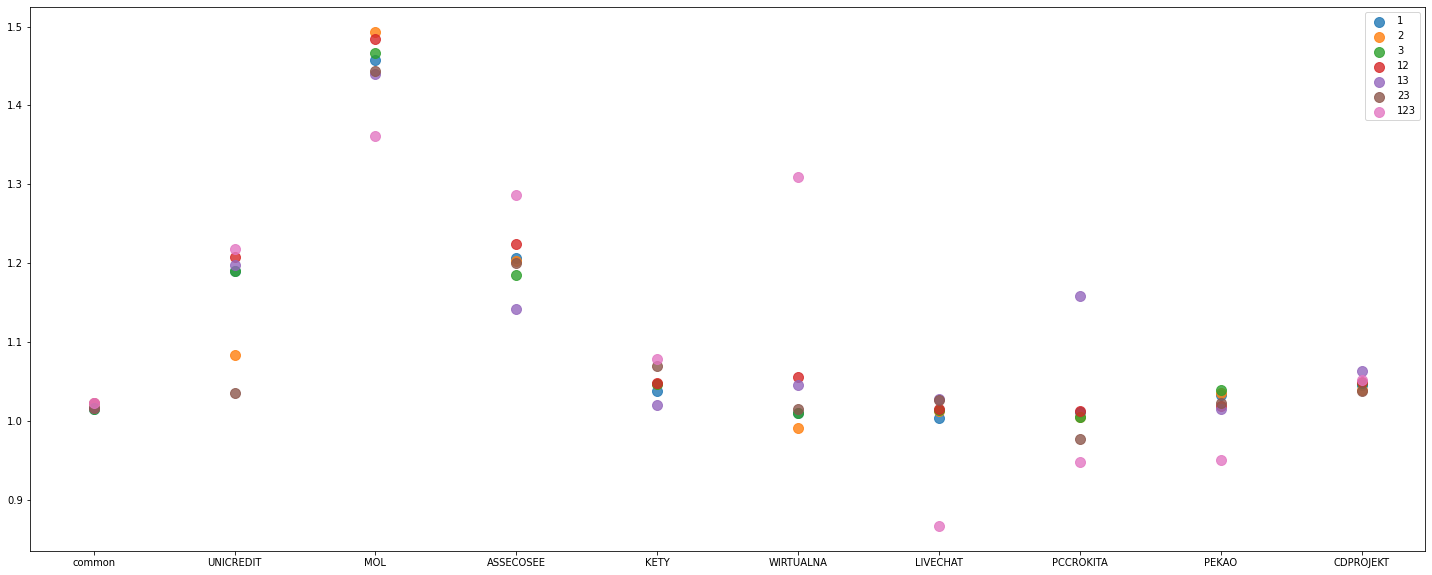

In [339]:
companies_to_test = ["", 'UNICREDIT',	'MOL',	'ASSECOSEE',	'KETY',	'WIRTUALNA','LIVECHAT',	'PCCROKITA'	,'PEKAO', "CDPROJEKT"]
companies_to_test_name = ["common", 'UNICREDIT',	'MOL',	'ASSECOSEE',	'KETY',	'WIRTUALNA','LIVECHAT',	'PCCROKITA'	,'PEKAO', "CDPROJEKT"]
var_to_test = ["1", "2", "3", "12", "13", "23", "123"]

fig, ax = plt.subplots(1, 1, figsize = (25, 10))
fig.subplots_adjust(hspace=0.3)
ax.set_xticklabels(companies_to_test_name)
ax.set_xticks(range(len(companies_to_test_name)))

ans_loss = {}
for it_var, vars in enumerate(var_to_test):
    ans_loss = []
    d = len(vars)
    coefn = np.power(m+1,d)
    jt_tab = [[int(x) for x in np.base_repr(i, base=m+1).zfill(d)] for i in range(coefn)]
    for it_comp, filtr_val in enumerate(companies_to_test):
            filtr = df['company'] if filtr_val=='' else filtr_val
            filtr_df = df[df['company']==filtr]

            dfs = []
            filtr_df_ = filtr_df.sample(frac=1).dropna()
            dfs = np.array_split(filtr_df_, 10)  

            loss_tab = []

            for cross_it in range(10):

                test_df = dfs[cross_it]
                filtr_df = pd.concat(dfs).drop(test_df.index)


                ## TRAIN
                xt = [filtr_df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

                ct = pd.DataFrame(np.transpose([xt[i] for i in [0]+list(map(lambda x: int(x), list(vars)))]))

                values_2 = []
                for pol_f in l_poln:
                    c_tab = []
                    for idx, col in ct.iteritems():
                        c_tab.append([pol_f(x) for x in col])
                    values_2.append(c_tab)

                ctp = np.array(values_2)

                B_j_Y = [[row for row in ctp[fun][0]] for fun in range(len(l_poln))]
                B_j_Y = np.array(B_j_Y)

                coef = []
                for row in range(len(ctp[0][0])):
                    ans = []
                    for jt in jt_tab:
                        ans.append(np.product([ctp[jt[i]][i+1][row] for i in range(len(jt))]))
                    coef.append(ans)
                coef = np.array(coef)
                B_j_tab = [np.matmul(np.matmul(np.linalg.inv(np.matmul(coef.T,coef)),coef.T),B_j_Y[y_j]) for y_j in range(len(B_j_Y))]


                ## EVALUATION
                xt = [test_df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

                ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))
                values_2 = []
                for pol_f in l_poln:
                    c_tab = []
                    for idx, col in ct.iteritems():
                        c_tab.append([pol_f(x) for x in col])
                    values_2.append(c_tab)

                ctp = np.array(values_2)

                pt = np.zeros(shape=(len(l_poln),len(ct)))
                for j in range(len(l_poln)):
                    for it, jt in enumerate(jt_tab):
                        pt[j] += B_j_tab[j][it]*np.product([ctp[jt[c], c+1] for c in range(d)], axis=0)

                for i in range(len(l_poln)-1, -1, -1):
                    pt[i] /= pt[0]

                x_range = np.arange(0,1,0.0001)
                y_vals = np.array([np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in x_range])
                y_vals = np.where(y_vals<treshold, 0.03, y_vals) 
                norm_val = np.trapz(y_vals, x=x_range)
                y_vals = y_vals / norm_val # normalize

                py_ = []
                for i in range(1,len(ct)-1):
                    ap_val = np.sum([pt[j][i] * l_poln[j](ct.iloc[i,0]) for j in range(len(l_poln))]) # / norm_val
                    py_.append(ap_val)

                py_ = pd.DataFrame(py_)
                loss = py_.mean().values[0]

                loss_tab.append(loss)
            
            # print(f'vars: {vars}({it_var}) company:{filtr_val}({it_comp}) loss: {np.mean(loss_tab)}')
            ans_loss.append(np.mean(loss_tab))
    ax.scatter(range(len(ans_loss)), ans_loss, label=vars, s=100, alpha=0.8)

plt.legend(loc="upper right")
plt.show()

company: ASSECOSEE: train_len=729, test_len=81


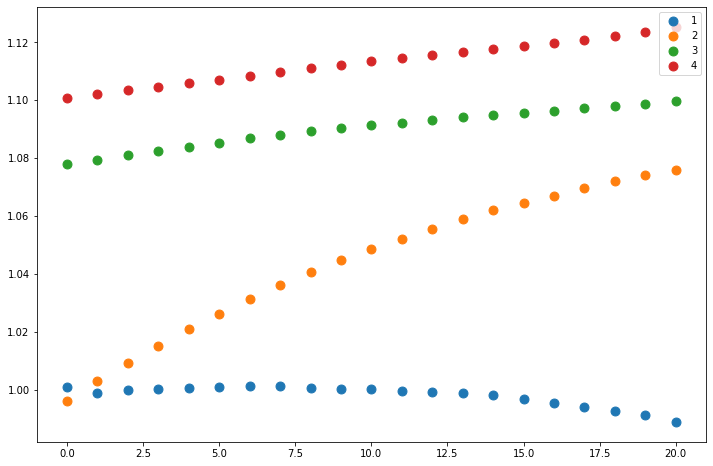

In [340]:
ans_loss = []
filtr_val = 'ASSECOSEE'
filtr = df['company'] if filtr_val=='' else filtr_val
filtr_df = df[df['company']==filtr]

dfs = []
filtr_df_ = filtr_df.sample(frac=1).dropna()
dfs = np.array_split(filtr_df_, 10)  

loss_tab = []

print(f'company: {filtr_val}: train_len={len(dfs[0])*9}, test_len={len(dfs[0]) * 1}')

plt.figure(figsize=(12, 8))

for max_y_moment in range(2, len(l_poln)+1):
    ans_loss = []
    for max_x_moment in range(1, len(jt_tab), len(jt_tab)//20):
        for cross_it in range(10):

            test_df = dfs[cross_it]
            filtr_df = pd.concat(dfs).drop(test_df.index)


            ## TRAIN
            xt = [filtr_df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

            ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))

            values_2 = []
            for pol_f in l_poln:
                c_tab = []
                for idx, col in ct.iteritems():
                    c_tab.append([pol_f(x) for x in col])
                values_2.append(c_tab)

            ctp = np.array(values_2)

            B_j_Y = [[row for row in ctp[fun][0]] for fun in range(len(l_poln))]
            B_j_Y = np.array(B_j_Y)

            coef = []
            for row in range(len(ctp[0][0])):
                ans = []
                for jt in jt_tab[:max_x_moment]: #[:max_x_moment]
                    ans.append(np.product([ctp[jt[i]][i+1][row] for i in range(len(jt))]))
                coef.append(ans)
            coef = np.array(coef)
            B_j_tab = [np.matmul(np.matmul(np.linalg.inv(np.matmul(coef.T,coef)),coef.T),B_j_Y[y_j]) for y_j in range(len(B_j_Y))]

            ## EVALUATION
            xt = [test_df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

            ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))
            values_2 = []
            for pol_f in l_poln:
                c_tab = []
                for idx, col in ct.iteritems():
                    c_tab.append([pol_f(x) for x in col])
                values_2.append(c_tab)

            ctp = np.array(values_2)

            pt = np.zeros(shape=(len(l_poln),len(ct)))
            for j in range(len(l_poln[:max_y_moment])):
                for it, jt in enumerate(jt_tab[:max_x_moment]): #[:max_x_moment]
                    pt[j] += B_j_tab[j][it]*np.product([ctp[jt[c], c+1] for c in range(d)], axis=0)

            for i in range(len(l_poln)-1, -1, -1):
                pt[i] /= pt[0]

            x_range = np.arange(0,1,0.0001)
            y_vals = np.array([np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in x_range])
            y_vals = np.where(y_vals<treshold, 0.03, y_vals) 
            norm_val = np.trapz(y_vals, x=x_range)
            y_vals = y_vals / norm_val # normalize

            py_ = []
            for i in range(1,len(ct)-1):
                ap_val = np.sum([pt[j][i] * l_poln[j](ct.iloc[i,0]) for j in range(len(l_poln))]) # / norm_val
                py_.append(ap_val)

            py_ = pd.DataFrame(py_)
            loss = py_.mean().values[0]


            loss_tab.append(loss)
        
        # print(f'Y:{max_y_moment-1} X:{jt_tab[max_x_moment]} = {np.mean(loss_tab)}')
        filtr_val = 'common' if filtr_val=='' else filtr_val
        ans_loss.append(np.mean(loss_tab))

    plt.scatter(range(len(ans_loss)), ans_loss, label=str(max_y_moment-1), s=80)

plt.legend(loc="upper right")
plt.show()